In [13]:
import gdal
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#my code
from raster_sample import *
from profile_map_scanner import *




In [14]:
#send pd dataframe to csv for plotting in arc

creek= "Cache_creek_clip_MChiSegmented_whole_basin.csv"
read_path = "/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Cache_creek/"+creek#+"/" #Set path to data
#Creek name for M_chi segmented files
creek_data = np.genfromtxt((read_path), delimiter=',', skip_header=1, names=['node','row','col','latitude','longitude','chi','elevation','flow_distance','drainage_area','m_chi','b_chi','source_key','basin_key','segmented_elevation'])
#+name])
#+name
creek_data_df = pd.DataFrame(creek_data)
#convert to UTM
creek_data_df = convert_lat_long(creek_data_df)

pd.set_option('display.float_format', lambda x: '%.3f' % x)#remove scientific notation 
creek_data_df

write_path = '/Users/bmelosh/Documents/ArcGIS/Coast_Ranges/Cache_Creek/'
creek_data_df.to_csv('Cache_creek_m_chi.csv')

In [15]:
#Import the RASTER data
raster_path = "/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Cache_creek/"
raster = gdal.Open(raster_path + "/Cache_creek_clip_HS.bil")#Get raster data
dem = raster.ReadAsArray()

## IMPORT point DATA
creek= "Crack_canyon"
path = "/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Cache_creek/Previous_LSDTT_version/Channel_extraction/"+creek+"/" #Set path to data
name = creek+"_MChiSegmented.csv" #Set file name
creek_data = np.genfromtxt((path+name), delimiter=',', skip_header=1, names=['node', 'row', 'col', 'latitude', 'longitude', 'chi', 'elevation', 'flow_distance', 'drainage_area', 'm_chi', 'b_chi', 'source_key', 'basin_key', 'segmented_elevation'])


#Create pandas dataframe
creek_data_df = pd.DataFrame(creek_data)

#Create a distance column in pandas dataframe
#distance = creek_data_df['flow_distance'] - creek_data_df['flow_distance'].min()
#creek_data_df['distance'] = distance

#convert the lat long to utm from creek data, chi segmented (only need this if there is no x, y columns)
creek_data_df = convert_lat_long(creek_data_df)



In [9]:
#Create a bokeh plot of the raster
import bokeh.plotting as bp
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import gridplot, column


#pull out the products of raster subsampler
X,Y, array = raster_subsample_xy_generator(raster, creek_data_df)

#Create a bokeh source to use in interactive plots
source=bp.ColumnDataSource(creek_data_df)
color_by_variable('m_chi', source=source) #define color scheme for profiles

#define boundaries of the data
x_range, y_range = define_boundaries(source)
elev_range = define_elevation_boundaries(source)


#Create profile plots 

p = stream_map_raster(array, source, title='Map',x_axis_label='Easting', y_axis_label='Northing')

p2 = profile(elev_range, source, title='Elevation profile', x_axis_label='Distance', y_axis_label='Elevation')

p3 = profile(elev_range, source, x='chi', title='Chi profile', x_axis_label='Chi', y_axis_label='Elevation')


output_file("Profile comparison.html", title="Creek scanner")

plotcol = column(p2, p3)
grid = gridplot([[p, plotcol]])

bp.show(grid)  


In [196]:
#Import data for plotting best m/n ratio

#Im working on plotting data up using pandas to looke at MLE values for all m/n ratios of different channels,


mle_data = []
df = pd.DataFrame()
for i in range(1,9):
    num = '0.'+str(i)
    name2 = path+creek+'_movernstats_'+num+'_fullstats.csv'
    mle_data_i = np.genfromtxt(name2, delimiter=',', skip_header=1, names=['basin_key', 'reference_source_key', 'test_source_key','MLE','RMSE'])
    
    mle_data.append(mle_data_i)
    
    df_temp = pd.DataFrame(mle_data_i)
    df = pd.concat([df,df_temp]) 
    
    
    
    

    
    
del df['basin_key']
del df['reference_source_key']
df = df.rename(columns={'test_source_key': 'Tributary #'})


# checking.head()

group = df.groupby(['Tributary #'])

#fig = plt.figure()
#section = df3[['MLE']]
#section.plot()
#plt.show()





In [209]:
%cd ~/VagrantBoxes/LSDTopoTools/Git_projects/LSDMappingTools/
from LSDPlottingTools import LSDMap_MOverNPlotting as MN
%cd ~/projects/profile_generator/

/Users/bmelosh/VagrantBoxes/LSDTopoTools/Git_projects/LSDMappingTools
/Users/bmelosh/projects/profile_generator


In [221]:
creek =  'Perkins_creek'
this_dir = '/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Cache_creek/Previous_LSDTT_version/Channel_extraction/'+creek+'/'
MN.MakeChiPlotsMLE(this_dir, creek,start_movern=0.1, d_movern=0.1, n_movern=7)#basin_list=[], , size_format=args.size_format, FigFormat = args.FigFormat)
#MN.PlotSensitivityResultsSigma(this_dir, 'Crack_canyon')





This m/n is: 0.1
This basin key is 0
Getting the reference_source_key
0.0
This m/n is: 0.2
This basin key is 0
Getting the reference_source_key
0.0
This m/n is: 0.3
This basin key is 0
Getting the reference_source_key
0.0
This m/n is: 0.4
This basin key is 0
Getting the reference_source_key
0.0
This m/n is: 0.5
This basin key is 0
Getting the reference_source_key
0.0
This m/n is: 0.6
This basin key is 0
Getting the reference_source_key
0.0
This m/n is: 0.7
This basin key is 0
Getting the reference_source_key
0.0


In [18]:
#IMPORT MOVERN FILE WITH ALL THE DIFFERENT CHI VALUES FOR EACH M/N RATIO
creek =  'Perkins_creek'
path = '/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Cache_creek/Previous_LSDTT_version/Channel_extraction/'+creek+'/'
name = creek+'_movern.csv'
#Import Data
creek_movern_data = np.genfromtxt((path+name), delimiter=',', skip_header=1, names=['source_key','basin_key','elevation','m_over_n = 0.1','m_over_n = 0.2','m_over_n = 0.3','m_over_n = 0.4','m_over_n = 0.5','m_over_n = 0.6','m_over_n = 0.7','m_over_n = 0.8'])

creek_movern_df = pd.DataFrame(creek_movern_data)

creek_movern_df.head()


,source_key,basin_key,elevation,m_over_n__01,m_over_n__02,m_over_n__03,m_over_n__04,m_over_n__05,m_over_n__06,m_over_n__07,m_over_n__08
0,0.000,0.000,557.960,12269.000,1705.200,252.080,40.388,7.087,1.357,0.279,0.061
1,0.000,0.000,557.890,12266.000,1704.300,251.820,40.321,7.069,1.352,0.278,0.060
2,0.000,0.000,557.570,12263.000,1703.600,251.650,40.274,7.056,1.349,0.277,0.060
3,0.000,0.000,557.490,12261.000,1703.000,251.470,40.226,7.043,1.345,0.276,0.060
4,0.000,0.000,557.310,12257.000,1702.000,251.220,40.159,7.025,1.341,0.275,0.060


In [140]:
#PULLING DATA OUT OF MOVERN FILE WITH CHI VALUES FOR EVERY M/N RATIO FOR EACH TRIBUTARY

#creek_movern_df
creek_movern_df = creek_movern_df.rename(columns={'source_key': 'Tributary'})

g = creek_movern_df.groupby(['Tributary'])#groups data by tributary aka source key
for source_key, source_key_df in g:
    print(source_key)#prints tributary number aka source key (0 is main stem)
    #print(source_key_df) #prints the dataframe for all tributaries, don't do this, it is long.
    
#pulls out Chi and elevation values for every m/n ratio at the tributary you specify
g.get_group(1.0)

0.0
1.0
2.0
3.0


,Tributary,basin_key,elevation,m_over_n__01,m_over_n__02,m_over_n__03,m_over_n__04,m_over_n__05,m_over_n__06,m_over_n__07,m_over_n__08
709,1.000,0.000,554.790,12153.000,1681.600,247.550,39.622,6.991,1.358,0.286,0.064
710,1.000,0.000,554.090,12151.000,1680.900,247.370,39.571,6.977,1.355,0.285,0.064
711,1.000,0.000,553.790,12148.000,1680.200,247.180,39.519,6.963,1.351,0.284,0.064
712,1.000,0.000,553.790,12146.000,1679.500,246.990,39.468,6.949,1.347,0.283,0.063
713,1.000,0.000,553.790,12143.000,1678.800,246.800,39.417,6.935,1.343,0.282,0.063
714,1.000,0.000,553.340,12140.000,1677.900,246.540,39.345,6.915,1.338,0.281,0.063
715,1.000,0.000,552.850,12137.000,1677.200,246.350,39.294,6.901,1.334,0.280,0.062
716,1.000,0.000,552.640,12135.000,1676.500,246.170,39.243,6.887,1.330,0.279,0.062
717,1.000,0.000,552.600,12132.000,1675.800,245.980,39.193,6.874,1.326,0.278,0.062
718,1.000,0.000,552.600,12129.000,1674.900,245.720,39.121,6.854,1.321,0.276,0.061


In [314]:
import pandas as pd
import numpy as np

#Create array of mn values to iterate through (start_mn, end_mn, number of mn values)
mn_values = [x / 10.0 for x in range(1, 9, 1)]#create a list of floats.


creek = 'Perkins_creek'
path2 = '/Users/bmelosh/VagrantBoxes/LSDTopoTools/Topographic_projects/Cache_creek/Previous_LSDTT_version/Channel_extraction/'+creek+'/'
    
mle_data_i = []

for mn in mn_values: 
    num = str(mn)
    name2 = '%s%s_movernstats_%s_fullstats.csv' % (path2, creek, num)
 
    mle_data = np.genfromtxt(name2, delimiter=',', skip_header=1, names=['basin_key', 'reference_source_key', 'test_source_key','MLE','RMSE'])
    
    mle_data = pd.DataFrame(mle_data)
    mle_data_i.append(mle_data)

mle_data_combined = pd.concat(mle_data_i,keys=mn_values)

#MLE DATA FOR EACH TRIBUTARY FOR EVERY M/N RATIO
mle_data_combined#.loc[0.1] #Can pull data out related to m/n ratio
#reformat the data, take out blank columns and rename one
del mle_data_combined['basin_key']
del mle_data_combined['reference_source_key']
mle_data_combined = mle_data_combined.rename(columns={'test_source_key': 'Tributary'})#rename the columns

#print(mle_data_combined)
#mle_data_combined.index.levels[0]

#Assign new column to data frame based on dataframe keys
mle_data_combined.reset_index(level=0, inplace=True)
mle_data_combined = mle_data_combined.rename(columns={'level_0': 'm/n value'})#rename new column

# g2 = mle_data_combined.groupby(['Tributary'])#Group data by Tributary
# trib_number = mle_data_combined.Tributary.unique()#get length of number of unique values for tributaries, aka how many tributaries are there?
# for trib in trib_number:
#     g2.get_group(trib)#get group based on tributary #
#     print(g2.get_group(trib))

# trib_MLE_mn = []
# for mn in range(0,len(mn_values)):
#     trib_MLE_mn_i = trib['MLE'].iloc[mn]#Get data from df for each trib and mn value
#     trib_MLE_mn.append(trib_MLE_mn_i)

#trib_MLE_mn = pd.DataFrame(trib_MLE_mn,columns=['MLE'])

g_mn = mle_data_combined.groupby(['m/n value'])#group by m/n value
mini = g_mn.get_group(0.1)['MLE'].min()
maxi = g_mn.get_group(0.1)['MLE'].max()
g_mn.get_group(0.1)['MLE']

0   0.999
1   1.000
2   0.997
Name: MLE, dtype: float64

In [316]:
#THIS IS CREATING A COLOR MAP TO PLOT MLE DATA FOR EACH TRIBUTARY 
import matplotlib as mpl
import matplotlib.pyplot as plt

this_cmap = plt.cm.plasma
cNorm  = mpl.colors.Normalize(vmin=mini, vmax=maxi)
test = plt.cm.ScalarMappable(norm=cNorm, cmap=this_cmap)

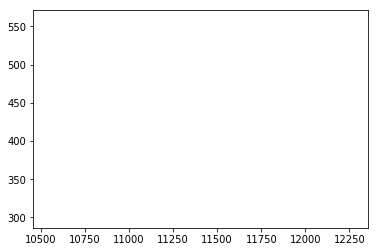

In [328]:

y = creek_movern_df['elevation']
x = creek_movern_df['m_over_n__01']

fig = plt.figure()
# creek_movern_df.plot(x='m_over_n__01', y='elevation', style='bo')#with pandas
plt.scatter(x,y,c=c,cmap=this_cmap, norm=cNorm,)

plt.show()

In [326]:
c=list(g_mn.get_group(0.1)['MLE'])
type(c)

list